In [ ]:
#importing some important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#to load dataset
df=pd.read_csv('/content/drive/MyDrive/ML notebook/creditcard.csv')

#to show first 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#to show shape of dataset means how many column and rows in dataset
df.shape

(284807, 31)

In [ ]:
#to check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#to check datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

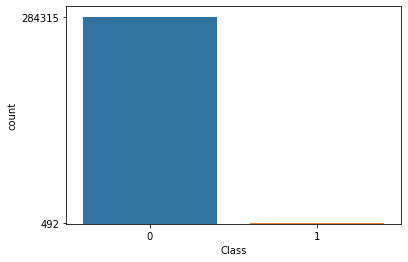

In [ ]:
#to check in class how many categories in class column
sns.countplot(data=df,x='Class')
f=df['Class'].value_counts()
plt.yticks(f)
plt.show()

In [ ]:
#select input and output
X=df.drop("Class",axis=1)   #input variable
Y=df["Class"]        #output variable

In [ ]:
#split data into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#apply scaling on input data means 70%traning and testing data
from sklearn.preprocessing import StandardScaler

#create object of standardscaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)    #on training we apply fit_transform
X_test=ss.transform(X_test)          #on testing we apply only transform because our testing data not fitted

In [ ]:
#check the model is balanced or not
df['Class'].value_counts()   #here our data is unbalance/imbalaced

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#if data is imbalance then use sampling Technique
#We handle Imbalance data ,We take some Samling Technique.
''' There are 2 types of Sampling Technique : -
1. Random Over Sampling TEchnique  2.Random Under Sampling TEchnique'''

' There are 2 types of Sampling Technique : -\n1. Random Over Sampling TEchnique  2.Random Under Sampling TEchnique'

In [ ]:
#If you have basically reducing the majority class means 
#remove record randomly from majority class that is known as 
#Random Undersampling ,
#and if you are increasing the minority class means create a duplicate
#row randomly that is known as Random over sampling

In [ ]:
#install package imblearn only one time
!pip install imblearn

In [ ]:
#use randomoversampler 
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#create object of randomoversampler
ros=RandomOverSampler()

In [ ]:
#apply randomoversampler on 70% training data only
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

#fit_resample() inbuilt method of randomoversampler

In [ ]:
#check before balancing dataset means before applying randomoversamper on training data
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [ ]:
#check after balancing data means after applying randomoversampler on training data
pd.Series(Y_train_ros).value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [ ]:
#applying randomoversampler on 30% testing data 
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [ ]:
#check before balancing testing data means before applying randomoversamper on 30% tetsing data
pd.Series(Y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [ ]:
#check after balancing testing data means after applying randomoversampler on testing data
pd.Series(Y_test_ros).value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [ ]:
#create def function for the model
def create_model(model):
  model.fit(X_train_ros,Y_train_ros)   #train the model
  Y_predict=model.predict(X_test_ros)  #test the model
  print(classification_report(Y_test_ros,Y_predict))
  print("confusion matrix:")

  #confusion matrix
  print(confusion_matrix(Y_test_ros,Y_predict))
  return model

In [ ]:
#import classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#Baseline model:import logistic regression model
from sklearn.linear_model import LogisticRegression

#create object of LogisticRegression
lr=LogisticRegression()

In [ ]:
#call the function 
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

confusion matrix:
[[83716  1592]
 [ 8706 76602]]


In [ ]:
#create a decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

#create object of decisiontreeclasifier
dt=DecisionTreeClassifier()


In [ ]:
#call the function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85308
           1       1.00      0.65      0.79     85308

    accuracy                           0.82    170616
   macro avg       0.87      0.82      0.82    170616
weighted avg       0.87      0.82      0.82    170616

confusion matrix:
[[85271    37]
 [30153 55155]]


In [ ]:
#information gain of the features
IG=dt.feature_importances_
print(IG)

[1.25643925e-02 1.08982653e-03 5.70661228e-04 3.50933790e-03
 3.97496264e-02 1.37555501e-02 1.49327322e-04 1.15935520e-02
 2.15933547e-03 5.37105480e-03 9.08888889e-03 4.65875031e-03
 3.80080655e-02 1.12249982e-02 7.57163255e-01 8.01562578e-05
 1.37890075e-02 1.12350611e-03 7.22374292e-03 5.39068236e-03
 2.23513847e-02 2.06046562e-03 4.58769915e-03 3.14642894e-03
 2.37463892e-04 1.43872570e-04 8.60968998e-03 9.02410376e-05
 5.11462664e-03 1.53944104e-02]


In [ ]:
column=X.columns

In [ ]:
#create A dataframe with sorting to disply information gain
dic={'Input':column,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values('Information_Gain',ascending=False)

,Input,Information_Gain
14,V14,0.757163
4,V4,0.039750
12,V12,0.038008
20,V20,0.022351
29,Amount,0.015394
16,V16,0.013789
5,V5,0.013756
0,Time,0.012564
7,V7,0.011594
13,V13,0.011225


In [ ]:
#create a decision tree
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt,feature_names=features,filled=True)


<Figure size 1440x1440 with 0 Axes>

In [ ]:
#pruning technique to reduce overfitting from decisiontreeclassifer

In [ ]:
#But we got less score 0.66 % its good but not excellent , 
#region behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

#How to reduced a overfitting situation 
#By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter
#leaf means no child

In [ ]:
#Limitation of decisiontreeclassifier :the model is overfit many times
#advantage of decisiontreeclassifier:we do not select features manually

In [ ]:
#1.max_depth
#1. max_depth parameter  
##create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(max_depth=6,random_state=1)
#Note : max_depth can not more than 8
#by default use method : gini index

In [ ]:
#train the model with max_depth parameter
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     85308
           1       0.96      0.82      0.89     85308

    accuracy                           0.89    170616
   macro avg       0.90      0.89      0.89    170616
weighted avg       0.90      0.89      0.89    170616

confusion matrix:
[[82752  2556]
 [15550 69758]]


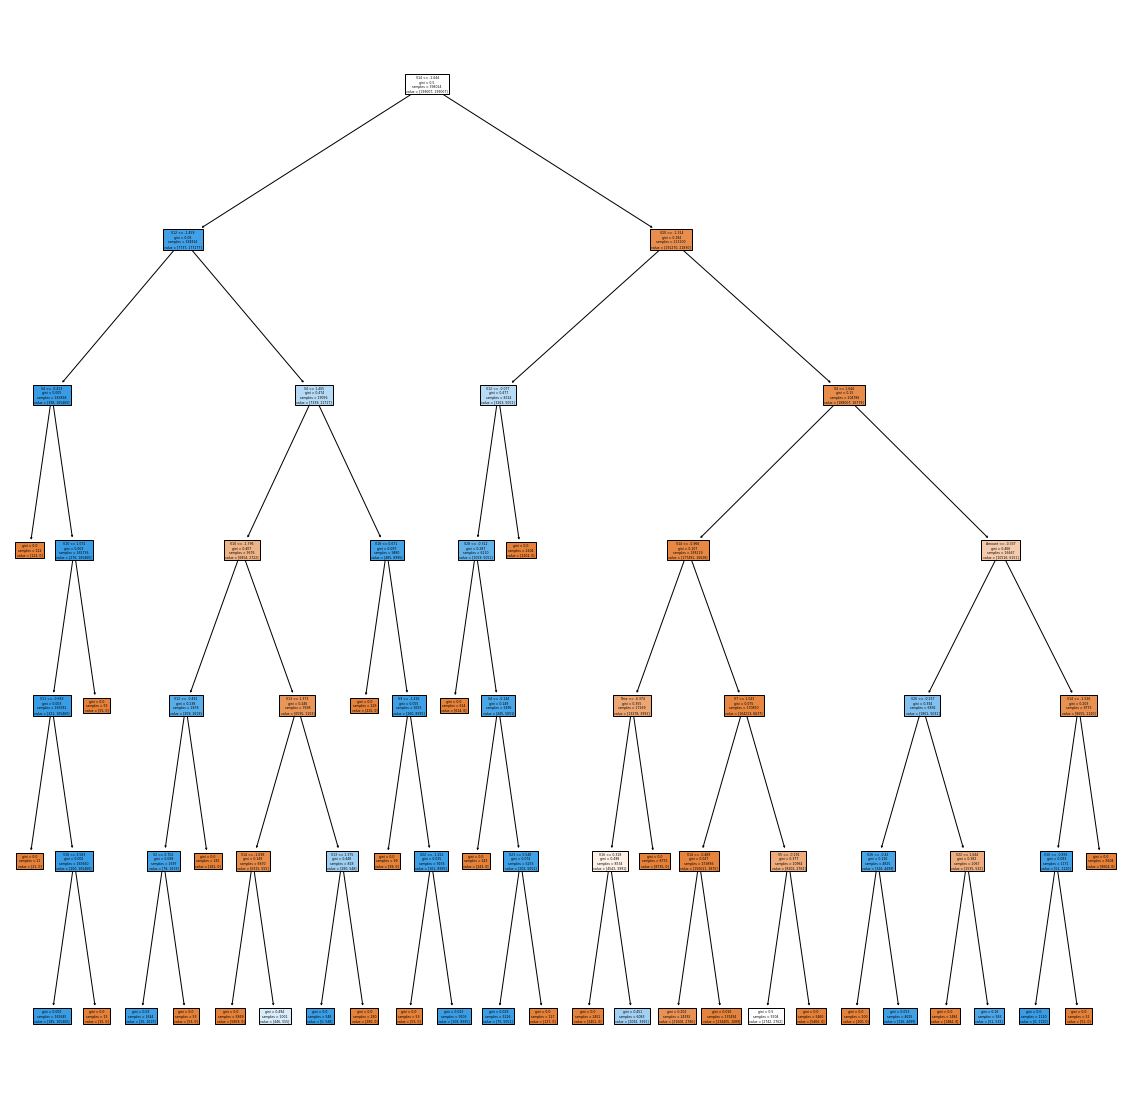

In [ ]:
#again create the tree with max_depth parameter
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [ ]:
#check importanat features with max_depth parameter
IG=dt1.feature_importances_
print(IG)

[1.02172057e-02 0.00000000e+00 5.38904131e-04 0.00000000e+00
 4.25976227e-02 7.46995767e-03 0.00000000e+00 5.75621935e-03
 0.00000000e+00 1.02301246e-03 9.56315906e-03 2.26694285e-04
 4.06866586e-02 4.70553675e-03 8.06435471e-01 0.00000000e+00
 8.30078848e-03 0.00000000e+00 2.24556533e-03 0.00000000e+00
 2.38866444e-02 0.00000000e+00 4.32883609e-03 1.30226107e-03
 0.00000000e+00 0.00000000e+00 9.09999738e-03 0.00000000e+00
 5.04848157e-03 1.65669844e-02]


In [ ]:
column=X.columns

In [ ]:
#cretae a dataframe for information gain
dic={'Input':column,'Information_Gain':IG}
df2=pd.DataFrame(dic)
df2.sort_values('Information_Gain',ascending=False)


,Input,Information_Gain
14,V14,0.806435
4,V4,0.042598
12,V12,0.040687
20,V20,0.023887
29,Amount,0.016567
0,Time,0.010217
10,V10,0.009563
26,V26,0.009100
16,V16,0.008301
5,V5,0.007470


In [ ]:
#apply 2nd method min_sample_leaf:
#2nd purning technique : min_samples_leaf
#min_samples_leaf =50 or more means not less than=50
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(min_samples_leaf=70,random_state=1)

In [ ]:
#call function(train the model)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion matrix:
[[85058   250]
 [17472 67836]]


In [ ]:
# max_depth=4 of pruning technique is best for the creditcard dataset till that.

In [ ]:
#display the information gain

IG=dt2.feature_importances_
print(IG)
column=X.columns

#creaet a dataframe
dic={'Input':column,'Information_Gain':IG}
df3=pd.DataFrame(dic)
df3.sort_values('Information_Gain',ascending=False)


[1.25121539e-02 3.15388532e-06 0.00000000e+00 3.36800653e-03
 3.97772829e-02 1.33889911e-02 2.28427080e-08 1.11887240e-02
 1.76129166e-04 5.37074874e-03 7.98962624e-03 4.45076947e-03
 3.86807735e-02 1.19926849e-02 7.63939259e-01 6.74696883e-04
 1.34764720e-02 9.56915608e-04 7.06450974e-03 5.13264774e-03
 2.23051370e-02 2.11646751e-03 3.52637148e-03 3.14391502e-03
 6.89370027e-08 4.79553811e-06 8.49798018e-03 1.90514090e-07
 4.76824760e-03 1.54932584e-02]


,Input,Information_Gain
14,V14,7.639393e-01
4,V4,3.977728e-02
12,V12,3.868077e-02
20,V20,2.230514e-02
29,Amount,1.549326e-02
16,V16,1.347647e-02
5,V5,1.338899e-02
0,Time,1.251215e-02
13,V13,1.199268e-02
7,V7,1.118872e-02


In [ ]:
#create tree with min_samples_leaf
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt2,feature_names=features,filled=True)

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#use of entropy method
#use entropy method of decisiontree 
#means -P(yes)*log2P(yes)-P(No)*log2(P(no))
#here log2 means base of log=2
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(criterion='entropy',
                           max_depth=3,random_state=1)
#bydefault criterion='gini' means 1-P(yes)^2-Q(no)^2

In [ ]:
#call function train the model with max_depth of entropy method
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.97      0.85      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion matrix:
[[82844  2464]
 [12446 72862]]


In [ ]:
#create object of decisionTreeClasifier class
dt4=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=70,random_state=1)

In [ ]:
#call function and train the model with min_samples_leaf of entropy method
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

confusion matrix:
[[85043   265]
 [16815 68493]]


In [ ]:
#The max_depth with gini index is best for creditcard dataset from both of gini index and entropy of max_Depth and min_samples_leaf method
#The value of max_depth of gini index is 6 score is 0.85 this is the good for credit card dataset

In [ ]:
'''Énsembling Technique:-
1.Naive Aggregation method
  a.Hard voting  b.soft voting
2.Bootstraping method
 a.Bagging   b.pasting  c.random forest tree
3.Boosting Technique
 a.ADA Boost   b.Gradient Boost  c.xtreme Gradient Boost(XGB)
4.Stacking classifier 
'''

#only Bootstraping method and Boosting techniques are we study here
#only those 2 methods are important for data scientist

'Énsembling Technique:-\n1.Naive Aggregation method\n  a.Hard voting  b.soft voting\n2.Bootstraping method\n a.Bagging   b.pasting  c.random forest tree\n3.Boosting Technique\n a.ADA Boost   b.Gradient Boost  c.xtreme Gradient Boost(XGB)\n4.Stacking classifier \n'

In [ ]:
#Ensembling Technique
#Random forest tree:-
#Random forest tree mostly work on bagging
'''
Train the dataset on multiple decisiontreeclassifier algorithum

'''
#call random forest tree from pckage
#ensemble means to train the same dataset from multiple algorithum

'\nTrain the dataset on multiple decisiontreeclassifier algorithum\n\n'

In [ ]:
#import the randomforesttree 
from sklearn.ensemble import RandomForestClassifier

#create object of randomforestclasifer
rfc=RandomForestClassifier(n_estimators=10,max_features=15,random_state=1)

#here n_estimators means take how many no. of decisiontreeclassifier
#max_features mean max important columns means input

In [ ]:
#create the model
#call the function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       1.00      0.76      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

confusion matrix:
[[85299     9]
 [20709 64599]]


ADA Boosting

In [ ]:
#ADA Boosting :-ADA Boost making decision stump
#Apply ADA Boost on given dataset
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#create the object of AdaBoostClassifier class
ada=AdaBoostClassifier(n_estimators=25,random_state=1)
#n_Estimators can be <=100 means n_estimators can not be more then 100

In [ ]:
#call fuction
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85308
           1       0.97      0.88      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

confusion matrix:
[[83045  2263]
 [ 9966 75342]]


In [ ]:
#Gradient Boosting:-
#2.Gradient Boosting:-Its basically focus on short comings error menas fully grown tree
#error means residual=actual output-predicted output

#2.gradient boost technique:-second technique of Boosting Ensembling technique
#GB:-its create a fully grown tree this algorithum is focus on short comings error.

In [ ]:
#call Gradient Boosting class
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#create object of GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=25,random_state=1)
#n_estimators can be <=100 bydefault algorithum decisiontreeclassifier

In [ ]:
#call the function
gb=create_model(gb)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

confusion matrix:
[[84421   887]
 [11190 74118]]


Xtreme Gradient Boosting Dataset:_

In [ ]:
#xtreme Gradient Boosting:3rd technique of Boosting
#This is better version of gradient Boosting__hort fromXB
#why call better version of Gradient Boosting:-
#  1.XG Boosting use:-Multithreading technique
#  2.It takes less memory space and faster
#  3.It is very useful to handle huge amt of data:-Its deal large amt of data
#  4.Its handle outlier because have inbuilt capability
#  5.Its handle null values
#  6.Its handle automatic overfitting situation.

In [ ]:
#install the external package from python's community first for XGBoost
!pip install xgboost

In [ ]:
#import the class of xtremegradientboosting
from xgboost import XGBClassifier


In [ ]:
#create object of XGBClassifier
xgb=XGBClassifier(n_estimators=25,reg_alpha=1,random_state=1)

#automatic overfitting:reg means regularization and alpha or lambda:hyperparameter
#n_estimators can be <=100

In [ ]:
#call the function
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

confusion matrix:
[[84612   696]
 [11794 73514]]


In [ ]:
#In Boosting technique the Ada Boost technique is bets for our dataset because using €ada€boost technique our core is 88.

KNN-algorithum:-


In [ ]:
#SVC:support vector classifier
from sklearn.svm import LinearSVC

In [ ]:
#create object of LinearSVC class
svc=LinearSVC(random_state=1)  #by default hard margin

In [ ]:
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

confusion matrix:
[[83885  1423]
 [ 9983 75325]]


In [ ]:
#Soft margin means to reduced overfitting situation means some error add on
#training time 
#create object of LinearSVC class
svc1=LinearSVC(random_state=1,C=0.5)    #C means adding error
##add some error on training time set error 0.01,0.05,....... 
#value of parameter C is not more than 1
#we does not add more error means c values are large

In [ ]:
#call the function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

confusion matrix:
[[83916  1392]
 [ 9983 75325]]


In [ ]:
#if add external error on training time but no any changes on score
#means given dataset in non-Linear
#can be possible , dataset is not linear means dataset is non-linear  .
#use Non-linear kernal function of SVM means 2 classes are not 
#separatable with straight line

In [ ]:
#There are 3 types of Kernal function of SVM
#1. Linear SVC  : use for linear data
#2. Non-Linear SVC : use for non-linear data
  #1. polynomial kernal function : increase the low dimension to high dimension
  #2. radial basis kernal function:-draw the circular hyperparameter

#here 2. polynomial kernal function : increase the low dimension to 
#high dimension
#3. radial basis kernal function  both are non-linear data

In [ ]:
#2.polynomial kernel function (non-linear)
from sklearn.svm import SVC
#svc inbuilt class for non-linear data

In [ ]:
#create object of SVC class for polynomial
poly_svc=SVC(random_state=1,kernel='poly')

In [ ]:
#call the function
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     85308
           1       1.00      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

confusion matrix:
[[85083   225]
 [13701 71607]]


In [ ]:
#apply radial basis kernel function
radial_svc=SVC(random_state=1,kernel="rbf")

In [ ]:
#call the function
radial_svc=create_model(radial_svc)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     85308
           1       0.99      0.82      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

confusion matrix:
[[84533   775]
 [15621 69687]]


In our credit card dataset to predict accuracy the boosting method and Linear Support Vector Machine algorithum is best for dataset.